**Static** Saliency

Static Spectral Saliency
This algorithm examines the sudden changes in log-spectrum of an input image, extracts the spectral residual of an image in the spectral domain, and proposes a robust method to construct saliency map which suggests the positions of proto-objects in the image.*italicized text*

In [1]:
import cv2

%matplotlib inline

import matplotlib.pyplot as plt

import time

fig=plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

In [3]:
from PIL import Image, ImageFilter


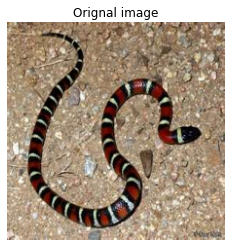

In [4]:
img = Image.open('snake.jpg') 
plt.imshow(img)
plt.title('Orignal image')
plt.axis('off');

In [49]:
image_path="/content/snake.jpg"

In [50]:
image_path="/content/cat_dog.png"

In [51]:
image=cv2.resize(cv2.imread(image_path),(600,400))


In [52]:
image

array([[[110, 136, 155],
        [110, 136, 154],
        [108, 135, 150],
        ...,
        [ 13,  18,  22],
        [ 14,  20,  25],
        [ 14,  20,  26]],

       [[112, 136, 155],
        [112, 136, 155],
        [110, 135, 151],
        ...,
        [ 14,  19,  23],
        [ 16,  22,  27],
        [ 16,  22,  28]],

       [[116, 137, 156],
        [116, 137, 155],
        [114, 136, 153],
        ...,
        [ 15,  21,  25],
        [ 19,  25,  30],
        [ 19,  25,  31]],

       ...,

       [[200, 223, 241],
        [200, 223, 240],
        [198, 221, 238],
        ...,
        [ 92, 106, 119],
        [ 93, 109, 120],
        [ 93, 109, 120]],

       [[191, 213, 240],
        [191, 213, 239],
        [191, 213, 238],
        ...,
        [ 91, 104, 118],
        [ 91, 105, 118],
        [ 91, 105, 118]],

       [[185, 207, 239],
        [185, 207, 239],
        [187, 209, 239],
        ...,
        [ 90, 103, 118],
        [ 90, 103, 117],
        [ 90, 103, 117]]

#converting image color space from BGR to RGB


In [53]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


# initialise OpenCV’s static saliency spectral residual detector and

# compute the saliency map

In [54]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

(success, saliencyMap) = saliency.computeSaliency(image)

saliencyMap = (saliencyMap * 255).astype("uint8")

#Applying thresholding to get binary image from saliency map



In [55]:
threshMap = cv2.threshold(saliencyMap, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


### Ploting results ###



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


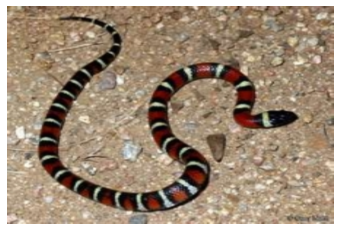

In [13]:
ax=fig.add_subplot(1, 3, 1)

ax.set_title('Original Image ')

plt.axis('off')

plt.imshow(image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


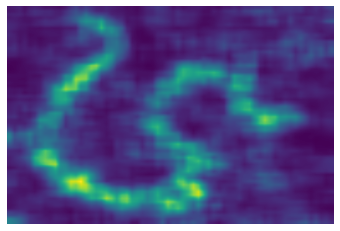

In [12]:

ax=fig.add_subplot(1, 3, 2)

ax.set_title('Saliency Map')

plt.axis('off')

plt.imshow(saliencyMap)


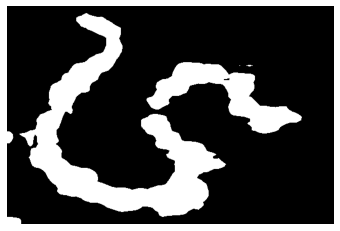

In [11]:
ax=fig.add_subplot(1, 3, 3)

ax.set_title('Thresholded image')

plt.axis('off')

plt.imshow(threshMap,cmap="gray")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


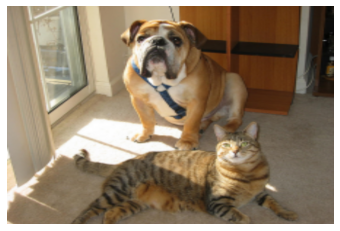

In [56]:
ax=fig.add_subplot(1, 3, 1)

ax.set_title('Original Image ')

plt.axis('off')

plt.imshow(image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


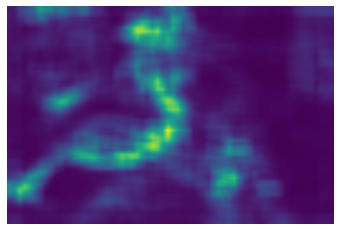

In [57]:
ax=fig.add_subplot(1, 3, 2)

ax.set_title('Saliency Map')

plt.axis('off')

plt.imshow(saliencyMap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


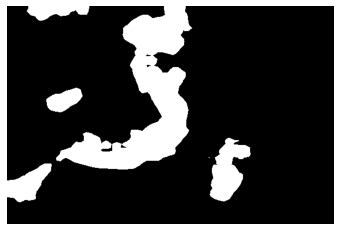

In [58]:
ax=fig.add_subplot(1, 3, 3)

ax.set_title('Thresholded image')

plt.axis('off')

plt.imshow(threshMap,cmap="gray")

**Fine-Grained Saliency**
This method calculates saliency based on center-surround differences. High-resolution saliency maps(heat maps) are generated in real time by using integral images.

In [59]:
image=cv2.resize(cv2.imread(image_path),(600,400))

#converting image color space from BGR to RGB

image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# initialise OpenCV’s static saliency spectral residual detector and

# compute the saliency map

In [60]:
saliency = cv2.saliency.StaticSaliencyFineGrained_create()

(success, saliencyMap) = saliency.computeSaliency(image)

saliencyMap = (saliencyMap*255).astype("uint8")

In [61]:
#Applying thresholding to get binary image from saliency map

threshMap = cv2.threshold(saliencyMap, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


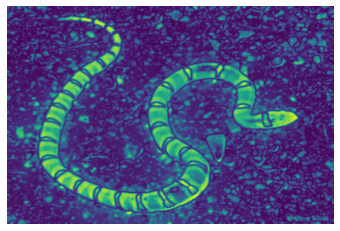

In [17]:
ax=fig.add_subplot(1, 3, 2)

ax.set_title('Saliency Map')

plt.axis('off')

plt.imshow(saliencyMap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


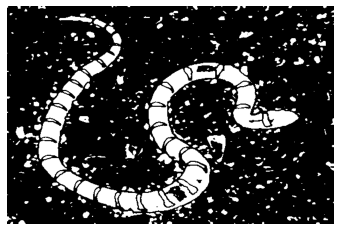

In [18]:
ax=fig.add_subplot(1, 3, 3)

ax.set_title('Thresholded image')

plt.axis('off')

plt.imshow(threshMap,cmap="gray")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


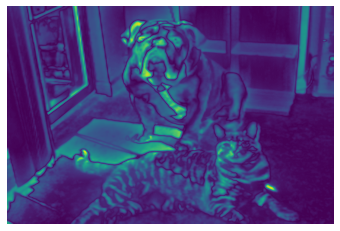

In [62]:
ax=fig.add_subplot(1, 3, 2)

ax.set_title('Saliency Map')

plt.axis('off')

plt.imshow(saliencyMap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


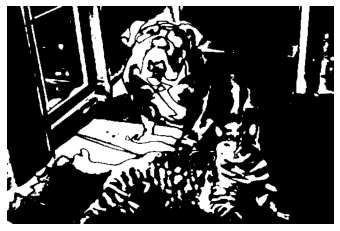

In [63]:
ax=fig.add_subplot(1, 3, 3)

ax.set_title('Thresholded image')

plt.axis('off')

plt.imshow(threshMap,cmap="gray")

FineGrained method gives detailed saliency map as compared to blobs returned by Spectral Residual. Spectral Residual method does not perform well when the features are really small, whereas Fine Grained method provides better results in such conditions.

we can utilize these methods to generate a region of interests and provide extracted ROI features to classifier/tracker for classification /tracking. ROI saves a lot of unnecessary computation time.

It helps to locate where an object can be found in an image

# **Application**
* Target detection and cognition
* Image retrieval
* Object discovery
* Image segmentation
* Video summarization and skimming
* Image and video compression
* Image automation pruning
* Visual tracking

# **Motion Saliency:
 In this category of algorithms the salient object is detected on videos/ moving frames based on the change in features between subsequent frames.
# **Objectness: 
Objectness is usually represented as a value which reflects how likely an image window/bounding box covers an object of any category in the image. This category of algorithms, avoid making decisions initially, by proposing a small number of category-independent proposals, that are expected to cover all objects in an image.

In [45]:
image_path="/content/snake.jpg"


In [25]:
def backproject(source, target, levels = 2, scale = 1):
	hsv = cv2.cvtColor(source,	cv2.COLOR_BGR2HSV)
	hsvt = cv2.cvtColor(target,	cv2.COLOR_BGR2HSV)
	# calculating object histogram
	roihist = cv2.calcHist([hsv],[0, 1], None, [levels, levels], [0, 180, 0, 256] )

	# normalize histogram and apply backprojection
	cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
	dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256], scale)
	return dst

def saliency_by_backprojection(img):
	cv2.pyrMeanShiftFiltering(img, 2, 10, img, 4)

	backproj = np.uint8(backproject(img, img, levels = 2))
	cv2.normalize(backproj,backproj,0,255,cv2.NORM_MINMAX)
	saliencies = [backproj, backproj, backproj]
	saliency = cv2.merge(saliencies)

	cv2.pyrMeanShiftFiltering(saliency, 20, 200, saliency, 2)
	saliency = cv2.cvtColor(saliency, cv2.COLOR_BGR2GRAY)
	cv2.equalizeHist(saliency, saliency)

	return 255-saliency

def saliency_map(img):
	saliency_hsv = saliency_by_backprojection(img * 1)
	saliency = saliency_hsv
	(T, saliency) = cv2.threshold(saliency, 200, 255, cv2.THRESH_BINARY)
	return saliency

def largest_contours_rect(saliency):
	_, contours, hierarchy = cv2.findContours(saliency * 1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
	contours = sorted(contours, key = cv2.contourArea)
	return cv2.boundingRect(contours[-1])

def refine_saliency_with_grabcut(img, saliency):
	rect = largest_contours_rect(saliency)
	bgdmodel = np.zeros((1, 65),np.float64)
	fgdmodel = np.zeros((1, 65),np.float64)
	saliency[np.where(saliency > 0)] = cv2.GC_FGD
	mask = saliency
	cv2.grabCut(img, mask, rect, bgdmodel, fgdmodel, 1, cv2.GC_INIT_WITH_RECT)
	mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
	return mask

def backprojection_saliency(img):
	saliency = saliency_map(img)
	mask = refine_saliency_with_grabcut(img, saliency)
	return mask